In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df['mainroad'].unique(),df['guestroom'].unique(),df['basement'].unique(),df['hotwaterheating'].unique(),df['airconditioning'].unique(),df['prefarea'].unique(),df['furnishingstatus'].unique()

(array(['yes', 'no'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['yes', 'no'], dtype=object),
 array(['yes', 'no'], dtype=object),
 array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object))

In [6]:
df['mainroad'] = df['mainroad'].apply(lambda x:1 if x=='yes' else 0)


In [7]:
df['guestroom'] = df['guestroom'].apply(lambda x:1 if x=='yes' else 0)
df['basement'] = df['basement'].apply(lambda x:1 if x=='yes' else 0)
df['hotwaterheating'] = df['hotwaterheating'].apply(lambda x:1 if x=='yes' else 0)
df['airconditioning'] = df['airconditioning'].apply(lambda x:1 if x=='yes' else 0)
df['prefarea'] = df['prefarea'].apply(lambda x:1 if x=='yes' else 0)

In [8]:
onehot_encoder_furniture = OneHotEncoder()
furniture_status = onehot_encoder_furniture.fit_transform(df[['furnishingstatus']]).toarray()
furniture_status

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [9]:
furniture_df = pd.DataFrame(furniture_status,columns =onehot_encoder_furniture.get_feature_names_out(['furnishingstatus']))
furniture_df.head()

,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [10]:
df = pd.concat([df.drop(['furnishingstatus'],axis=1),furniture_df],axis=1)

In [11]:
df['mainroad'].unique(),df['guestroom'].unique(),df['basement'].unique(),df['hotwaterheating'].unique(),df['airconditioning'].unique(),df['prefarea'].unique()

(array([1, 0]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([1, 0]),
 array([1, 0]))

In [12]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0,0.0,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0,0.0,0.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.0,1.0,0.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0,0.0,0.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0,0.0,0.0


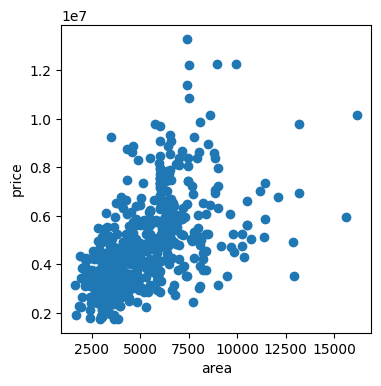

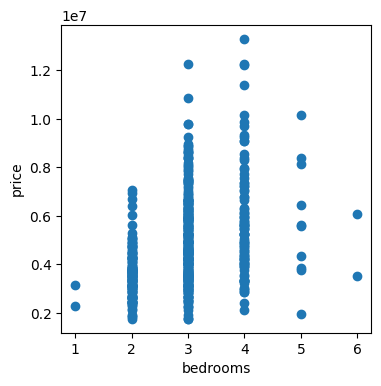

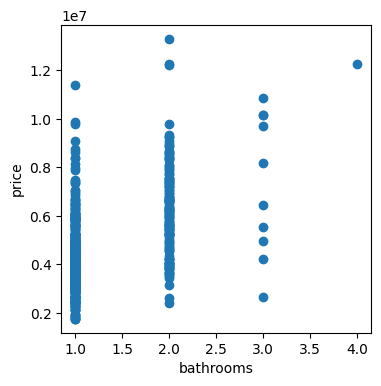

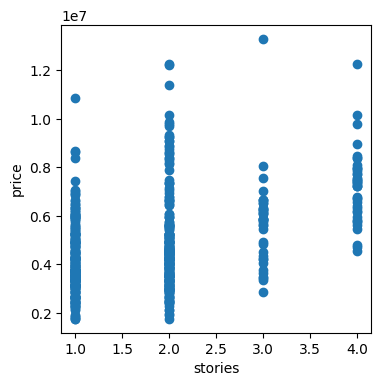

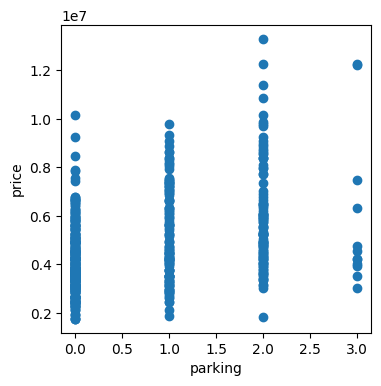

In [13]:
columns = ['area','bedrooms','bathrooms','stories','parking']
for col in columns:
    plt.figure(figsize=(4,4))
    plt.scatter(df[col],df['price'])
    plt.xlabel(col)
    plt.ylabel('price')
    plt.show()

In [14]:
X = df.drop(['price'],axis=1)
y = df['price']

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [16]:
scaler = StandardScaler()
X_train[['area']] = scaler.fit_transform(X_train[['area']])

In [17]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
305,-0.781796,3,1,2,1,0,0,0,0,1,0,0.0,1.0,0.0
91,0.769894,2,1,1,1,1,1,0,0,2,1,1.0,0.0,0.0
159,-0.922859,3,2,1,1,1,1,0,1,0,0,1.0,0.0,0.0
267,-0.090589,3,1,2,1,0,0,0,0,1,0,0.0,1.0,0.0
282,-1.381313,3,1,2,0,1,1,0,1,0,0,0.0,0.0,1.0


In [18]:
linearmodel = LinearRegression()
linearmodel.fit(X_train,y_train)

LinearRegression()

In [19]:
X_test[['area']] = scaler.transform(X_test[['area']])
y_pred = linearmodel.predict(X_test)

In [20]:
residuals = y_pred-y_test

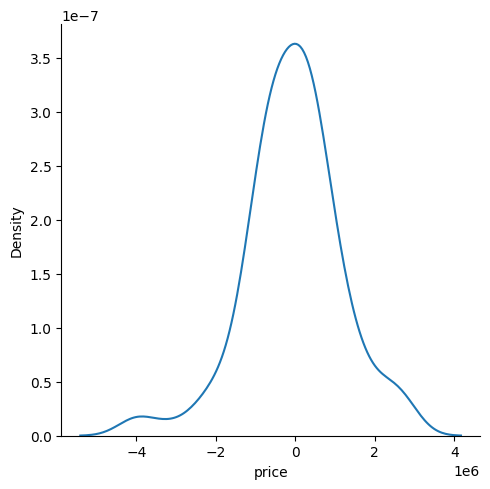

In [21]:
sns.displot(residuals,kind='kde')

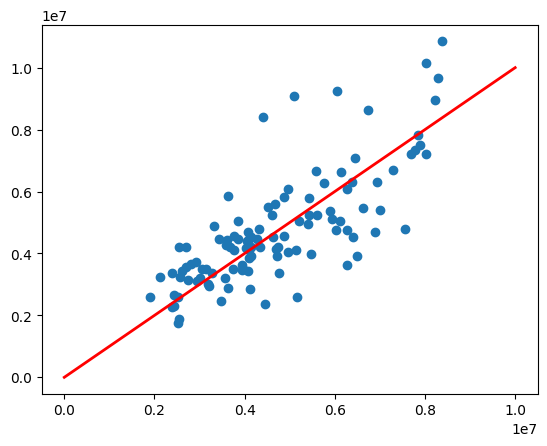

In [23]:
x = np.linspace(0, 10000000, 100)
y = x
plt.plot(x, y, 'r-', linewidth=2)
plt.scatter(y_pred,y_test)
plt.plot()
plt.show()

In [24]:
OLSmodel = sm.OLS(y_train,X_train).fit()
print(OLSmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     77.30
Date:                Sun, 08 Jun 2025   Prob (F-statistic):          7.84e-103
Time:                        22:57:36   Log-Likelihood:                -6651.6
No. Observations:                 436   AIC:                         1.333e+04
Df Residuals:                     422   BIC:                         1.339e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
area      

In [25]:
linearmodel.coef_

array([ 471244.29972791,   92646.45235391,  950802.82114436,
        524175.60360713,  468226.50712604,  333450.32647256,
        415577.02403645,  938450.10178983,  934770.80116715,
        309594.3455638 ,  725170.44432977,  192122.83997676,
         54994.15594792, -247116.99592467])

In [26]:
import pickle
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)
with open('onehot_encoder.pkl','wb') as f:
    pickle.dump(onehot_encoder_furniture,f)
with open('model.pkl','wb') as f:
    pickle.dump(linearmodel,f)

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error
print(mean_squared_error(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))
print(root_mean_squared_error(y_pred,y_test))

1436757462850.9436
887435.7590676466
1198648.1814322933


In [28]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.256881,0.416514,0.326606
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.437314,0.493434,0.469402
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000
